<a href="https://colab.research.google.com/github/dolDolSee/TF2.0/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf

class Conv(tf.keras.Model):
  def __init__(self):
    super(Conv, self).__init__()

    self.conv2D1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.conv2D2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')
    self.MaxPool = tf.keras.layers.MaxPooling2D(2)
    self.Flatten = tf.keras.layers.Flatten()
    self.Dense = tf.keras.layers.Dense(100, activation='relu')
    self.OutPut = tf.keras.layers.Dense(10, activation='softmax')

  def call(self,x):
    # print(x)
    inPut = tf.reshape(x,[-1, 28,28,1])
    # print(input)
    x = self.conv2D1(inPut)
    x = self.conv2D2(x)
    x = self.MaxPool(x)
    x = self.Flatten(x)
    x = self.Dense(x)
    x = self.OutPut(x)
    return x

model = Conv()

In [60]:
tf.reshape(tr_images,[-1, 28,28,1]).shape
tr_images.shape

(51000, 28, 28)

In [45]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)
  return images, labels

def get_preprocessed_ohe(images, labels):
  images, labels = get_preprocessed_data(images, labels)
  oh_labels = to_categorical(labels)
  return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state = 2021):
  train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
  test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
  tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
  return (tr_images, tr_oh_labels),(val_images, val_oh_labels),(test_images, test_oh_labels)

In [46]:
(tr_images, tr_oh_labels),(val_images, val_oh_labels),(test_images, test_oh_labels) = get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state = 2021)

In [47]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer = Adam(0.001),loss='categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

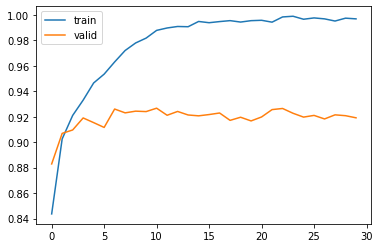

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
  plt.plot(history.history['Accuracy'],label='train')
  plt.plot(history.history['val_Accuracy'],label='valid')
  plt.legend()
show_history(history)

In [53]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 1s 11ms/step - loss: 0.6226 - Accuracy: 0.9179


[0.622579038143158, 0.917900025844574]

In [54]:
model.summary()

Model: "conv_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           multiple                  320       
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                  18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_6 (Flatten)          multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  1081700   
_________________________________________________________________
dense_12 (Dense)             multiple                  1010      
Total params: 1,101,526
Trainable params: 1,101,526
Non-trainable params: 0
__________________________________________________

In [55]:
class Conv(tf.keras.Model):
  def __init__(self):
    super(Conv, self).__init__()

    self.conv2D1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.conv2D2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')
    self.MaxPool = tf.keras.layers.MaxPooling2D(2)
    self.Flatten = tf.keras.layers.Flatten()
    self.dropout = tf.keras.layers.Dropout(0.5)
    self.Dense = tf.keras.layers.Dense(100, activation='relu')
    self.OutPut = tf.keras.layers.Dense(10, activation='softmax')

  def call(self,x):
    # print(x)
    inPut = tf.reshape(x,[-1, 28,28,1])
    # print(input)
    x = self.conv2D1(inPut)
    x = self.conv2D2(x)
    x = self.MaxPool(x)
    x = self.Flatten(x)
    x = self.dropout(x)
    x = self.Dense(x)
    x = self.OutPut(x)
    return x

model = Conv()

In [57]:
model.compile(optimizer = Adam(0.001),loss='categorical_crossentropy',metrics=['Accuracy'])
history = model.fit(tr_images, tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 7s 16ms/step - loss: 0.4477 - Accuracy: 0.8388 - val_loss: 0.3187 - val_Accuracy: 0.8840
Epoch 2/30
399/399 [==============================] - 6s 15ms/step - loss: 0.2971 - Accuracy: 0.8929 - val_loss: 0.2736 - val_Accuracy: 0.9010
Epoch 3/30
399/399 [==============================] - 6s 15ms/step - loss: 0.2511 - Accuracy: 0.9088 - val_loss: 0.2540 - val_Accuracy: 0.9064
Epoch 4/30
399/399 [==============================] - 6s 16ms/step - loss: 0.2155 - Accuracy: 0.9201 - val_loss: 0.2259 - val_Accuracy: 0.9163
Epoch 5/30
399/399 [==============================] - 6s 15ms/step - loss: 0.1885 - Accuracy: 0.9295 - val_loss: 0.2201 - val_Accuracy: 0.9186
Epoch 6/30
399/399 [==============================] - 6s 15ms/step - loss: 0.1694 - Accuracy: 0.9366 - val_loss: 0.2168 - val_Accuracy: 0.9218
Epoch 7/30
399/399 [==============================] - 6s 15ms/step - loss: 0.1527 - Accuracy: 0.9425 - val_loss: 0.2095 - val_Accuracy: 0.9260